# 비지도 학습

비지도 학습이란 알고 있는 출력값이나 정보 없이 학습 알고리즘을 가르쳐야 하는 모든 종류의 머신러닝을 가리킨다. <br>
비지도 학습에서 학습 알고리즘은 입력 데이터만으로 데이터에서 지식을 추출할 수 있어야 한다. <br>
비지도 학습에서 가장 어려운 일은 알고리즘이 뭔가 유용한 것을 학습했는지 평가하는 것이다. 비지도 학습은 레이블이 없는 데이터에 적용하기 때문에 <br>무엇이 올바른 출력인지 알 수 없다. 그래서 주로 비지도 학습은 탐색적 데이터 분석 단계(EDA)에서 많이 사용되며 지도 학습을 위한 데이터 전처리 단계에서도 사용한다.

## 비지도 변환(unsupervised transfrom) & 군집 알고리즘(clustering)

<p><strong>비지도 변환(unsupervised tranform)</strong>은 데이터를 새롭게 표현하여 사람이나 다른 머신러닝 알고리즘이 원래 데이터보다 쉽게 해석할 수 있도록 만드는 알고리즘이다.<br> 비지도 변환이 널리 사용되는 분야는 특성이 많은 고차원 데이터를 특성의 수를 줄이면서 꼭 필요한 특징을 포함한 데이터로 표현하는 방법인 <br>차원축소(diemsionality reduction)이다.</p>
<p><strong>군집 알고리즘(clustering)</strong>은 데이터를 비슷한 그릅끼리 묶는 것이다.</p>

## 데이터 전처리와 스케일 조정

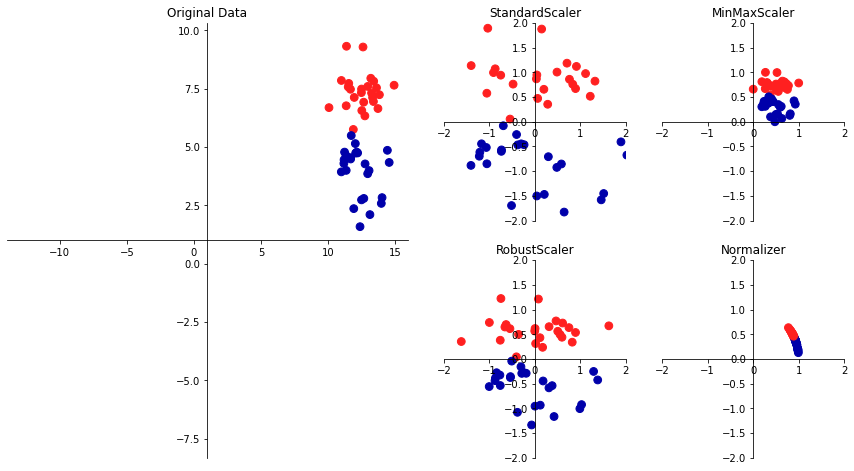

In [1]:
import mglearn

mglearn.plots.plot_scaling()

- StandardScaler : 평균이 0, 분산이 1이 되도록 데이터 포인트를 변환
- MinMaxScaler : 모든 값이 0과 1 사이에 위치하도록 변환
- RobustScaler : StandardScaler와 유사하지만 평균과 분산 대신에 중앙값과 사분위값을 사용하여 데이터 포인트를 변환. 이상치에 영향을 덜 받음
- Normalizer : 모든 feature vector의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정. 특성 벡터의 길이는 상관없고 데이터의 방향만 중요할 때 사용

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


- fit( ) or fit_transform( ) : 훈련 데이터에만 사용
- transform( ) : 테스트 데이터의 경우 transform만 사용

In [3]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [4]:
X_train_scaled = scaler.transform(X_train)
print("변환된 후 크기 :", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값 : \n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값 : \n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값 : \n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n", X_train_scaled.max(axis=0))

변환된 후 크기 : (426, 30)
스케일 조정 전 특성별 최소값 : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값 : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값 : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값 : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [5]:
X_test_scaled = scaler.transform(X_test)
print("스케일 조정 후 특성별 최소값 : \n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값 : \n", X_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값 : 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값 : 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### QuantileTransformer와 PowerTransformer

- QuantileTransformer는 기본적으로 1000개의 분위를 사용하여 데이터를 균등하게 분포시킨다. <br> RobustScaler와 비슷하게 이상치에 민감하지 않으며 전체 데이터를 0과 1 사이로 압축합니다.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

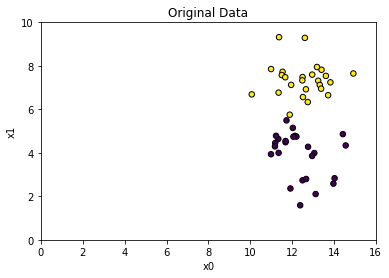

In [7]:
X, y = make_blobs(n_samples=50, centers =2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title('Original Data')
plt.show()

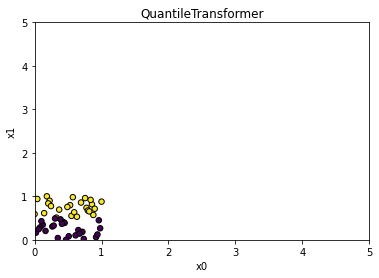

In [8]:
scaler = QuantileTransformer(n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

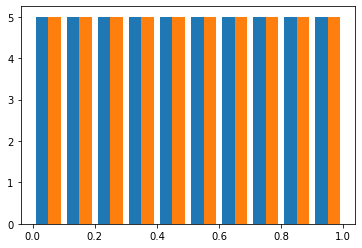

In [9]:
# Uniform Distribution
plt.hist(X_trans)
plt.show()

In [10]:
print(scaler.quantiles_.shape)

(50, 2)


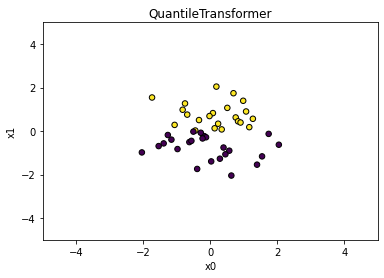

In [11]:
scaler = QuantileTransformer(output_distribution='normal', n_quantiles=50)
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

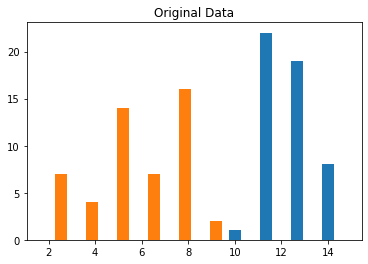

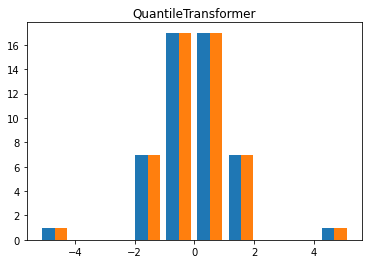

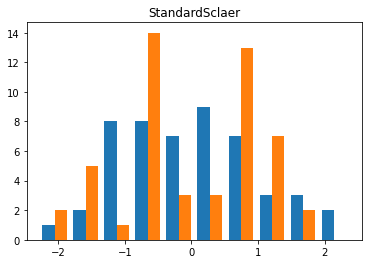

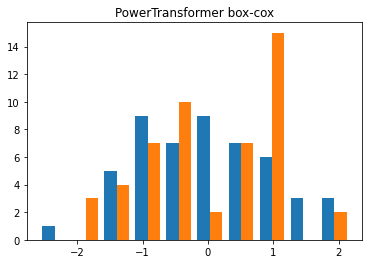

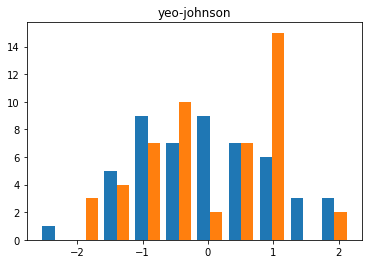

In [12]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal', n_quantiles=50).fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardSclaer')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('yeo-johnson')
plt.show()

In [13]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print(f"test accuracy : {svm.score(X_test, y_test):.2f}")

test accuracy : 0.63


In [14]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f"scaled test accuracy : {svm.score(X_test_scaled, y_test):.2f}")

scaled test accuracy : 0.95


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f"scaled test accuracy : {svm.score(X_test_scaled, y_test):.2f}")

scaled test accuracy : 0.97


## 차원 축소, 특성 추출, 매니폴드 학습

비지도 학습을 사용해 데이터를 변환하는 이유는 주로 시각화하거나, 데이터를 압축하거나, 지도학습에 사용하기 위해 정보가 더 잘 드러나는 표현을 찾기 위해서이다.

### 주성분 분석(PCA, Principal Component Analysis)

주성분 분석은 특성들이 통계적으로 상관관계가 없도록 데이터셋을 회전시키는 기술이다. <br> 회전한 뒤에 데이터를 설명하는 데 얼마나 중요하냐에 따라 종종 새로운 특성 중 일부만 선택된다.

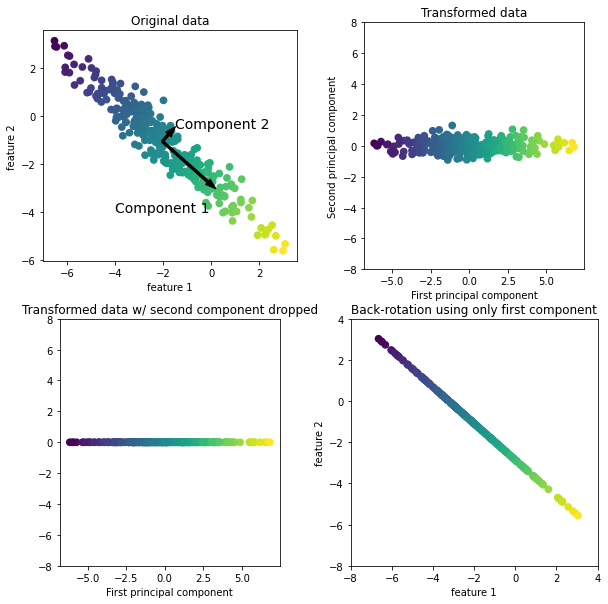

In [18]:
mglearn.plots.plot_pca_illustration()

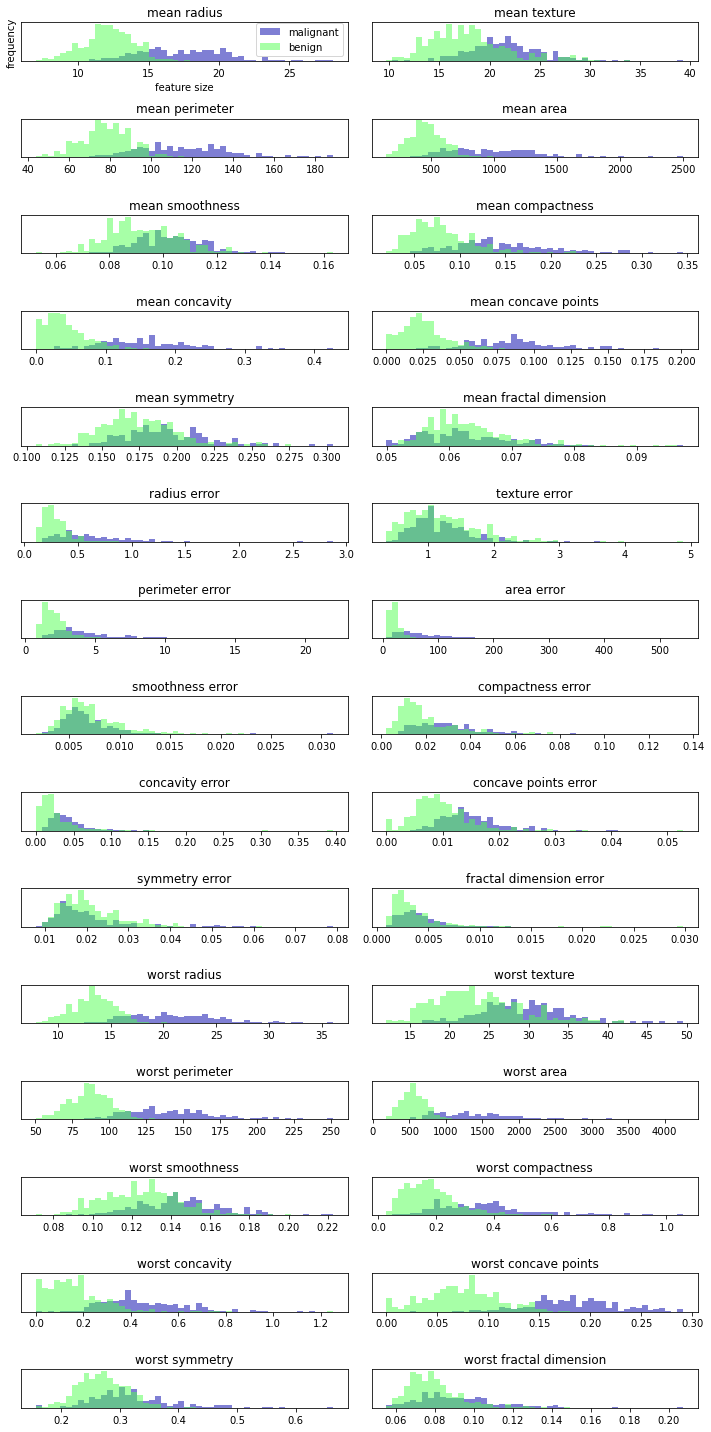

In [19]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('feature size')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant', 'benign'], loc='best')
fig.tight_layout()

이 그래프는 특성 간의 상호작용이나 이 상호작용이 클래스와 어떤 관련이 있는지는 전혀 알려주지 못한다. <br>
PCA를 사용하면 주요 상호작용을 찾으낼 수 있어 더 나은 그림을 만들 수 있다.

**PCA를 적용하기 전에 StandardScaler를 사용해 각 특성의 분산이 1이 되도록 데이터의 스케일을 조정해야한다.**

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cancer.data)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : ", X_scaled.shape)
print("축소된 데이터 형태 : ", X_pca.shape)

원본 데이터 형태 :  (569, 30)
축소된 데이터 형태 :  (569, 2)


Text(0, 0.5, '2nd principal component')

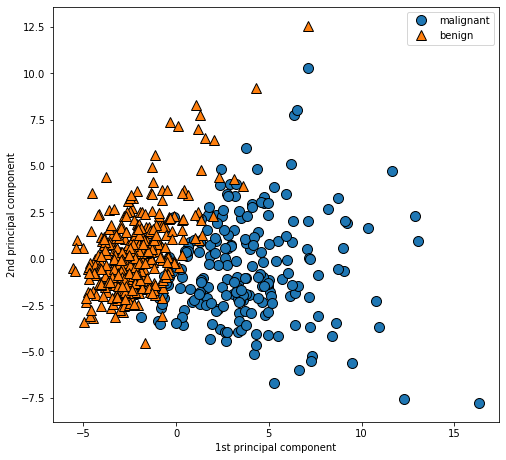

In [25]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(['malignant', 'benign'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('1st principal component')
plt.ylabel('2nd principal component')

PCA는 비지도 학습이므로 회전축을 찾을 때 어떤 클래스 정보도 사용하지 않는다. 단순히 데이터에 있는 상관관계만을 고려한다. <br>
PCA의 단점은 그래프의 두 축을 해석하기가 쉽지 않다는 점이다. 주성분은 원본 데이터에 있는 어떤 방향에 대응하는 여러 특성이 조합된 형태이다. 이런 조합은 ㅈ보통 매우 복잡하다.

In [26]:
print("PCA 주성분 형태 : ", pca.components_.shape)

PCA 주성분 형태 :  (2, 30)


In [28]:
print("PCA 주성분 : \n", pca.components_)

PCA 주성분 : 
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'principal component')

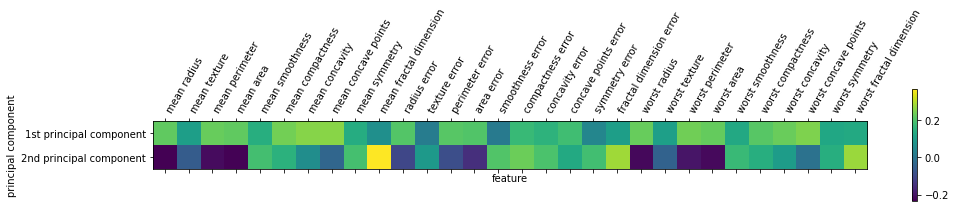

In [29]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ['1st principal component', '2nd principal component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('feature')
plt.ylabel('principal component')